<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 72.8 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 93.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 40.8 MB/s eta 0:00:00


In [2]:
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 110.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 114.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 108.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 15.2 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2024-12-09 01:24:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  66.5MB/s    in 2.3s    

2024-12-09 01:24:58 (66.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



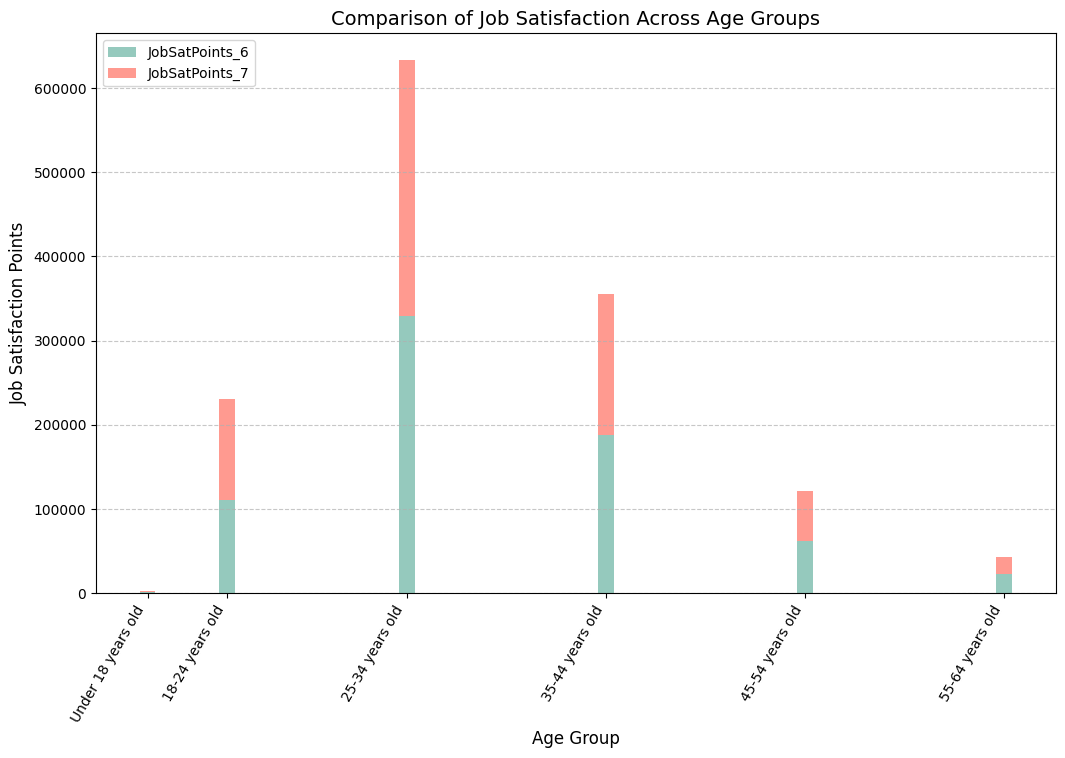

In [12]:
# Map 'Age' to numeric values for plotting
# Map 'Age' to numeric values for plotting
# Map Age into numeric values for plotting
age_mapping = {
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 30, 
    '35-44 years old': 40, 
    '45-54 years old': 50, 
    '55-64 years old': 60, 
    '65 years and older': 70
}

df['AgeNumeric'] = df['Age'].map(age_mapping)

# Group by Age and sum the JobSatPoints_6 and JobSatPoints_7
df_grouped = df.groupby('Age').agg({'JobSatPoints_6': 'sum', 'JobSatPoints_7': 'sum'}).reset_index()

# Map Age to numeric for better plot ordering
df_grouped['AgeNumeric'] = df_grouped['Age'].map(age_mapping)

# Increase figure size
plt.figure(figsize=(12, 8))

# Use different colors for the two satisfaction points
colors = ['#69b3a2', '#ff6f61']

# Plot JobSatPoints_6 and JobSatPoints_7 as stacked bars
plt.bar(df_grouped['AgeNumeric'], df_grouped['JobSatPoints_6'], label='JobSatPoints_6', color=colors[0], alpha=0.7)
plt.bar(df_grouped['AgeNumeric'], df_grouped['JobSatPoints_7'], label='JobSatPoints_7', bottom=df_grouped['JobSatPoints_6'], color=colors[1], alpha=0.7)

# Add labels and title with improved aesthetics
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Job Satisfaction Points', fontsize=12)
plt.title('Comparison of Job Satisfaction Across Age Groups', fontsize=14)

# Add x-tick labels (Age categories)
plt.xticks(df_grouped['AgeNumeric'], df_grouped['Age'], rotation=60, ha='right', fontsize=10)

# Add y-tick labels
plt.yticks(fontsize=10)

# Add a grid to help with readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend with better placement
plt.legend(loc='upper left', fontsize=10)

# Manually adjust layout for better spacing
plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9)

# Display the plot
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


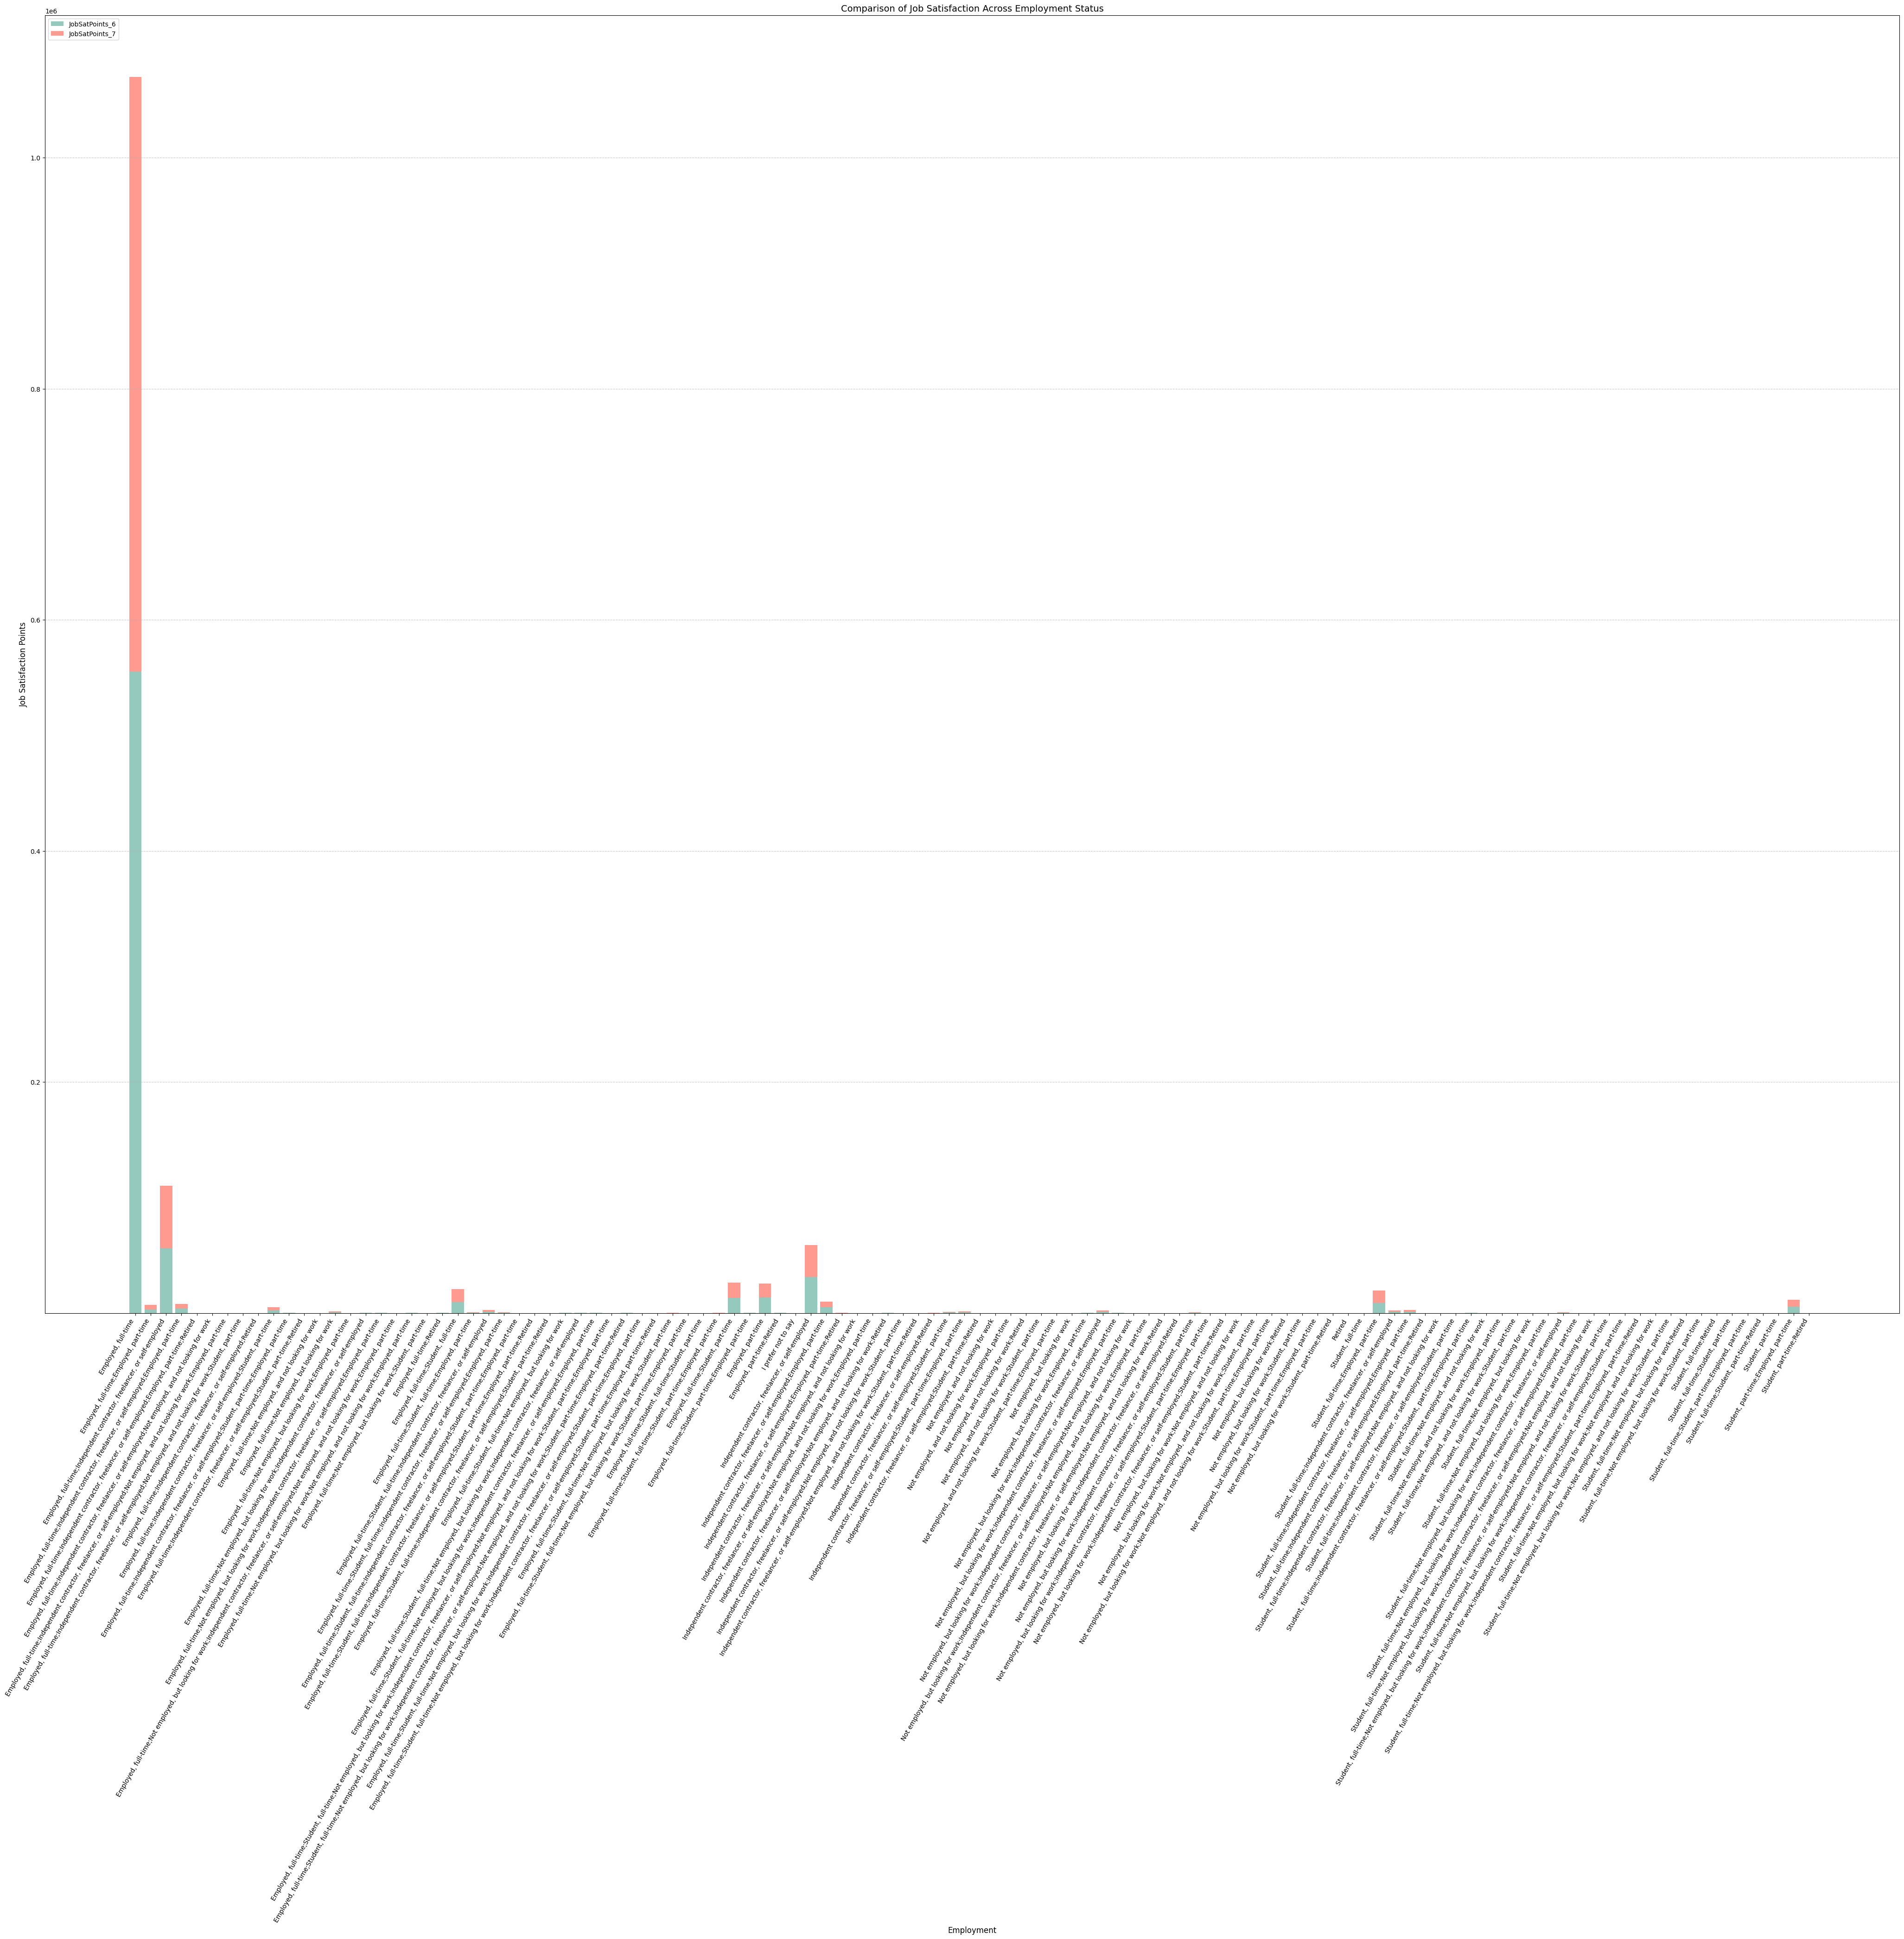

In [11]:
# Handle missing values (replace NaN with 0 for plotting)
df['JobSatPoints_6'] = df['JobSatPoints_6'].fillna(0)
df['JobSatPoints_7'] = df['JobSatPoints_7'].fillna(0)

# Group by Employment Status and sum the satisfaction points
df_grouped = df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].sum()

# Increase figure size
plt.figure(figsize=(50, 40))

# Use different colors for the two satisfaction points
colors = ['#69b3a2', '#ff6f61']

# Plot JobSatPoints_6 and JobSatPoints_7 as stacked bars
plt.bar(df_grouped.index, df_grouped['JobSatPoints_6'], label='JobSatPoints_6', color=colors[0], alpha=0.7)
plt.bar(df_grouped.index, df_grouped['JobSatPoints_7'], label='JobSatPoints_7', bottom=df_grouped['JobSatPoints_6'], color=colors[1], alpha=0.7)

# Add labels and title with improved aesthetics
plt.xlabel('Employment', fontsize=12)
plt.ylabel('Job Satisfaction Points', fontsize=12)
plt.title('Comparison of Job Satisfaction Across Employment Status', fontsize=14)
plt.xticks(rotation=60, ha='right', fontsize=10)  # Rotate x-axis labels more
plt.yticks(fontsize=10)

# Add a grid to help with readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend with better placement
plt.legend(loc='upper left', fontsize=10)

# Manually adjust layout for better spacing
plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9)

# Display the plot
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


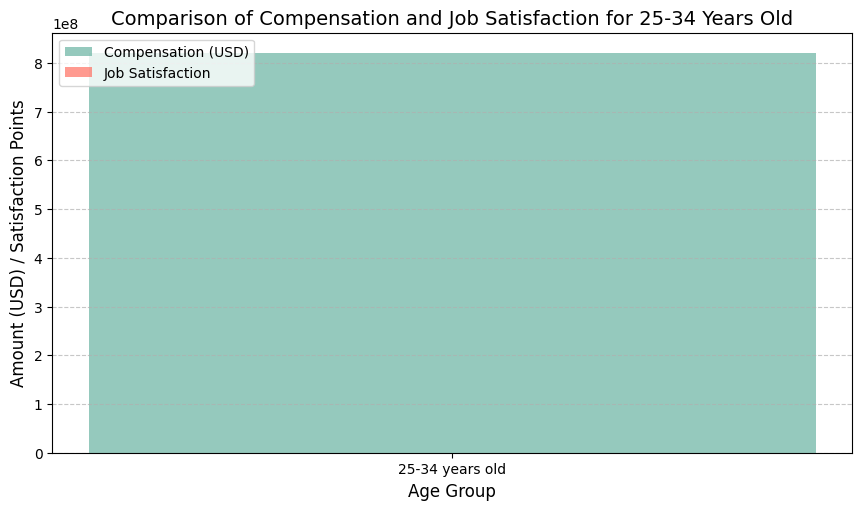

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame setup (replace with actual DataFrame loading)
# df = pd.read_csv('your_data.csv')

# Fill missing values for 'JobSatPoints_6' and 'ConvertedCompYearly'
df['JobSatPoints_6'] = df['JobSatPoints_6'].fillna(0)
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(0)

# Filter the DataFrame for the 25-34 years old age group
df_age_25_34 = df[df['Age'] == '25-34 years old']

# Group by Age (only 25-34 in this case)
df_grouped = df_age_25_34.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].sum()

# Increase figure size
plt.figure(figsize=(10, 6))

# Use different colors for Compensation and Job Satisfaction
colors = ['#69b3a2', '#ff6f61']  # Green for compensation, red for job satisfaction

# Plot Compensation and JobSatPoints_6 as stacked bars
plt.bar(df_grouped.index, df_grouped['ConvertedCompYearly'], label='Compensation (USD)', color=colors[0], alpha=0.7)
plt.bar(df_grouped.index, df_grouped['JobSatPoints_6'], label='Job Satisfaction', bottom=df_grouped['ConvertedCompYearly'], color=colors[1], alpha=0.7)

# Add labels and title with improved aesthetics
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Amount (USD) / Satisfaction Points', fontsize=12)
plt.title('Comparison of Compensation and Job Satisfaction for 25-34 Years Old', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)

# Add a grid to help with readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend with better placement
plt.legend(loc='upper left', fontsize=10)

# Manually adjust layout for better spacing
plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9)

# Display the plot
plt.show()


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.



Cleaned Data (first few rows):
    ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4

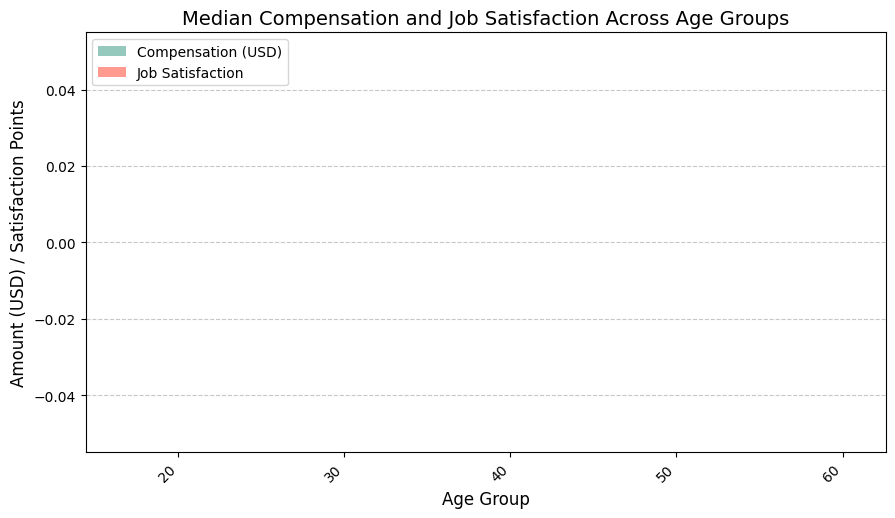

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame is loaded correctly, replace with actual DataFrame loading
# df = pd.read_csv('your_data.csv')

# Step 1: Handle missing values
df['JobSatPoints_6'] = df['JobSatPoints_6'].fillna(0)
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(0)

# Step 2: Map Age into numeric values
age_mapping = {
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 30, 
    '35-44 years old': 40, 
    '45-54 years old': 50, 
    '55-64 years old': 60, 
    '65 years and older': 70
}

# Ensure Age column has correct mappings
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Step 3: Drop rows where AgeNumeric is NaN
df_cleaned = df.dropna(subset=['AgeNumeric'])

# Debugging: Check the cleaned DataFrame
print("\nCleaned Data (first few rows):\n", df_cleaned.head())

# Step 4: Group by Age and calculate median for compensation and job satisfaction
df_grouped = df_cleaned.groupby('AgeNumeric')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Debugging: Check the grouped data
print("\nGrouped Data by Age (Median):\n", df_grouped)

# Step 5: Plotting the stacked bar chart
plt.figure(figsize=(10, 6))

# Use colors for compensation and satisfaction
colors = ['#69b3a2', '#ff6f61']

# Plot Compensation and JobSatPoints_6 as stacked bars (using median values)
plt.bar(df_grouped.index, df_grouped['ConvertedCompYearly'], label='Compensation (USD)', color=colors[0], alpha=0.7)
plt.bar(df_grouped.index, df_grouped['JobSatPoints_6'], label='Job Satisfaction', bottom=df_grouped['ConvertedCompYearly'], color=colors[1], alpha=0.7)

# Add labels and title
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Amount (USD) / Satisfaction Points', fontsize=12)
plt.title('Median Compensation and Job Satisfaction Across Age Groups', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add a grid for readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(loc='upper left', fontsize=10)

# Adjust layout for better spacing
plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9)

# Display the plot
plt.show()


                  Age  AgeNumeric
0  Under 18 years old        17.0
1     35-44 years old        40.0
2     45-54 years old        50.0
3     18-24 years old        21.0
4     18-24 years old        21.0


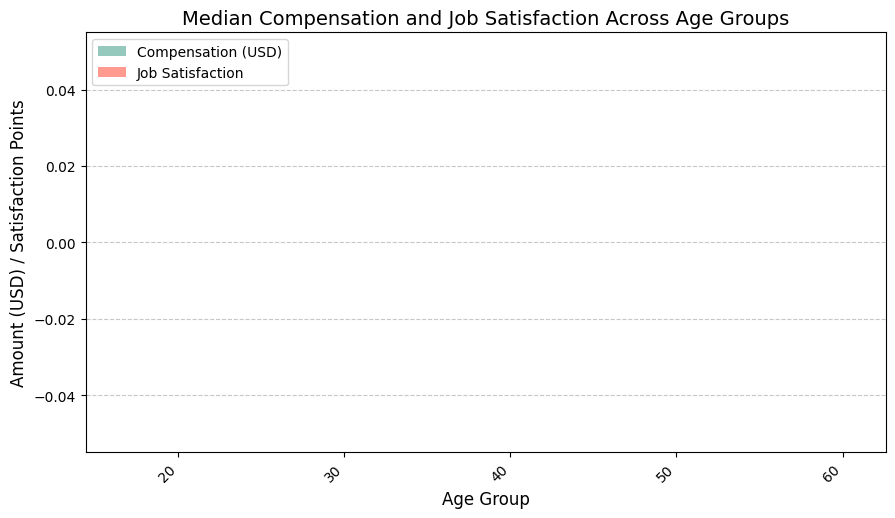

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame setup (replace with actual DataFrame loading)
# df = pd.read_csv('your_data.csv')

# Fill missing values for 'JobSatPoints_6' and 'ConvertedCompYearly'
df['JobSatPoints_6'] = df['JobSatPoints_6'].fillna(0)
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(0)

# Map Age values to numeric (if Age is a categorical column)
age_mapping = {
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 30, 
    '35-44 years old': 40, 
    '45-54 years old': 50, 
    '55-64 years old': 60, 
    '65 years and older': 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows where 'Age' or 'AgeNumeric' is NaN
df = df.dropna(subset=['AgeNumeric'])

# Check if Age column and new 'AgeNumeric' column are correctly populated
print(df[['Age', 'AgeNumeric']].head())

# Group by the newly created numeric Age and calculate median for Compensation and Job Satisfaction
df_grouped = df.groupby('AgeNumeric')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

# Increase figure size for better visualization
plt.figure(figsize=(10, 6))

# Use different colors for Compensation and Job Satisfaction
colors = ['#69b3a2', '#ff6f61']  # Green for compensation, red for job satisfaction

# Plot Compensation and JobSatPoints_6 as stacked bars (using median values)
plt.bar(df_grouped.index, df_grouped['ConvertedCompYearly'], label='Compensation (USD)', color=colors[0], alpha=0.7)
plt.bar(df_grouped.index, df_grouped['JobSatPoints_6'], label='Job Satisfaction', bottom=df_grouped['ConvertedCompYearly'], color=colors[1], alpha=0.7)

# Add labels and title with improved aesthetics
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Amount (USD) / Satisfaction Points', fontsize=12)
plt.title('Median Compensation and Job Satisfaction Across Age Groups', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add a grid to help with readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend with better placement
plt.legend(loc='upper left', fontsize=10)

# Manually adjust layout for better spacing
plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9)

# Display the plot
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.



Cleaned Data (first few rows):
    ResponseId                      MainBranch                 Age  \
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   
5           6     I code primarily as a hobby  Under 18 years old   

            Employment RemoteWork   Check  \
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   
5   Student, full-time        NaN  Apples   

                                    CodingActivities  \
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   
5

/tmp/ipykernel_84/391358924.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DatabasesList'] = df_cleaned['DatabaseWantToWorkWith'].apply(lambda x: x.split(';'))



Grouped Data by Age (count of each database):
 DatabasesList  BigQuery  Cassandra  Clickhouse  Cloud Firestore  Cockroachdb  \
AgeNumeric                                                                     
17                   25         67          16              103           35   
21                  421        666         264              682          286   
30                 1091        956         578              787          438   
40                  676        508         355              359          269   
50                  244        156          92              134          101   
60                   79         35          17               42           19   

DatabasesList  Cosmos DB  Couch DB  Couchbase  Databricks SQL  Datomic  ...  \
AgeNumeric                                                              ...   
17                    12        12          4               7        3  ...   
21                   212       119         70             170       55  ..

<Figure size 1000x600 with 0 Axes>

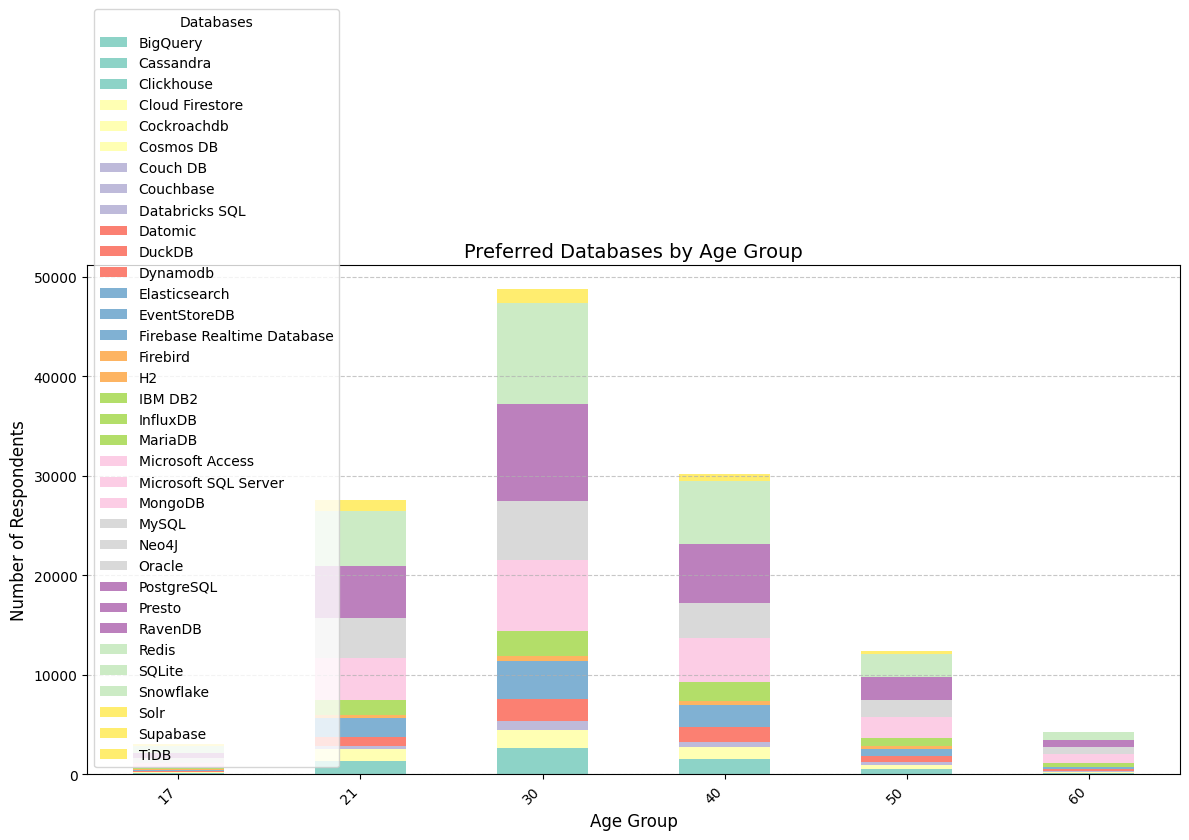

In [26]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Sample DataFrame structure for illustration (replace with actual data loading)

# Step 1: Map Age into numeric values
age_mapping = {
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 30, 
    '35-44 years old': 40, 
    '45-54 years old': 50, 
    '55-64 years old': 60, 
    '65 years and older': 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Step 2: Drop rows with NaN in Age and DatabasesWantToLearn
df_cleaned = df.dropna(subset=['AgeNumeric', 'DatabaseWantToWorkWith'])

# Debugging: Check the cleaned DataFrame
print("\nCleaned Data (first few rows):\n", df_cleaned.head())

# Step 3: Create a new column with lists of databases from DatabasesWantToLearn
df_cleaned['DatabasesList'] = df_cleaned['DatabaseWantToWorkWith'].apply(lambda x: x.split(';'))

# Step 4: Explode the lists into separate rows
df_exploded = df_cleaned.explode('DatabasesList')

# Step 5: Group by AgeNumeric and DatabasesList, and count the occurrences
df_grouped = df_exploded.groupby(['AgeNumeric', 'DatabasesList']).size().unstack(fill_value=0)

# Debugging: Check the grouped data
print("\nGrouped Data by Age (count of each database):\n", df_grouped)

# Step 6: Plotting the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot stacked bars for each age group and database preference
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')

# Add labels and title with improved aesthetics
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.title('Preferred Databases by Age Group', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add a grid for readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(title='Databases', fontsize=10)

# Adjust layout for better spacing
plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9)

# Display the plot
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.



Grouped Data by Employment and JobSatPoints_6:
 JobSatPoints_6                                      0.00    1.00    2.00    \
Employment                                                                   
Employed, full-time                                  22105      32      31   
Employed, full-time;Employed, part-time                122       0       0   
Employed, full-time;Independent contractor, fre...    1851       4       5   
Employed, full-time;Independent contractor, fre...      91       0       0   
Employed, full-time;Independent contractor, fre...       1       0       0   
...                                                    ...     ...     ...   
Student, full-time;Student, part-time;Employed,...       7       0       0   
Student, full-time;Student, part-time;Retired            2       0       0   
Student, part-time                                     485       0       0   
Student, part-time;Employed, part-time                 384       0       0   
Student, part-t

/tmp/ipykernel_84/4288801553.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 5000x4000 with 0 Axes>

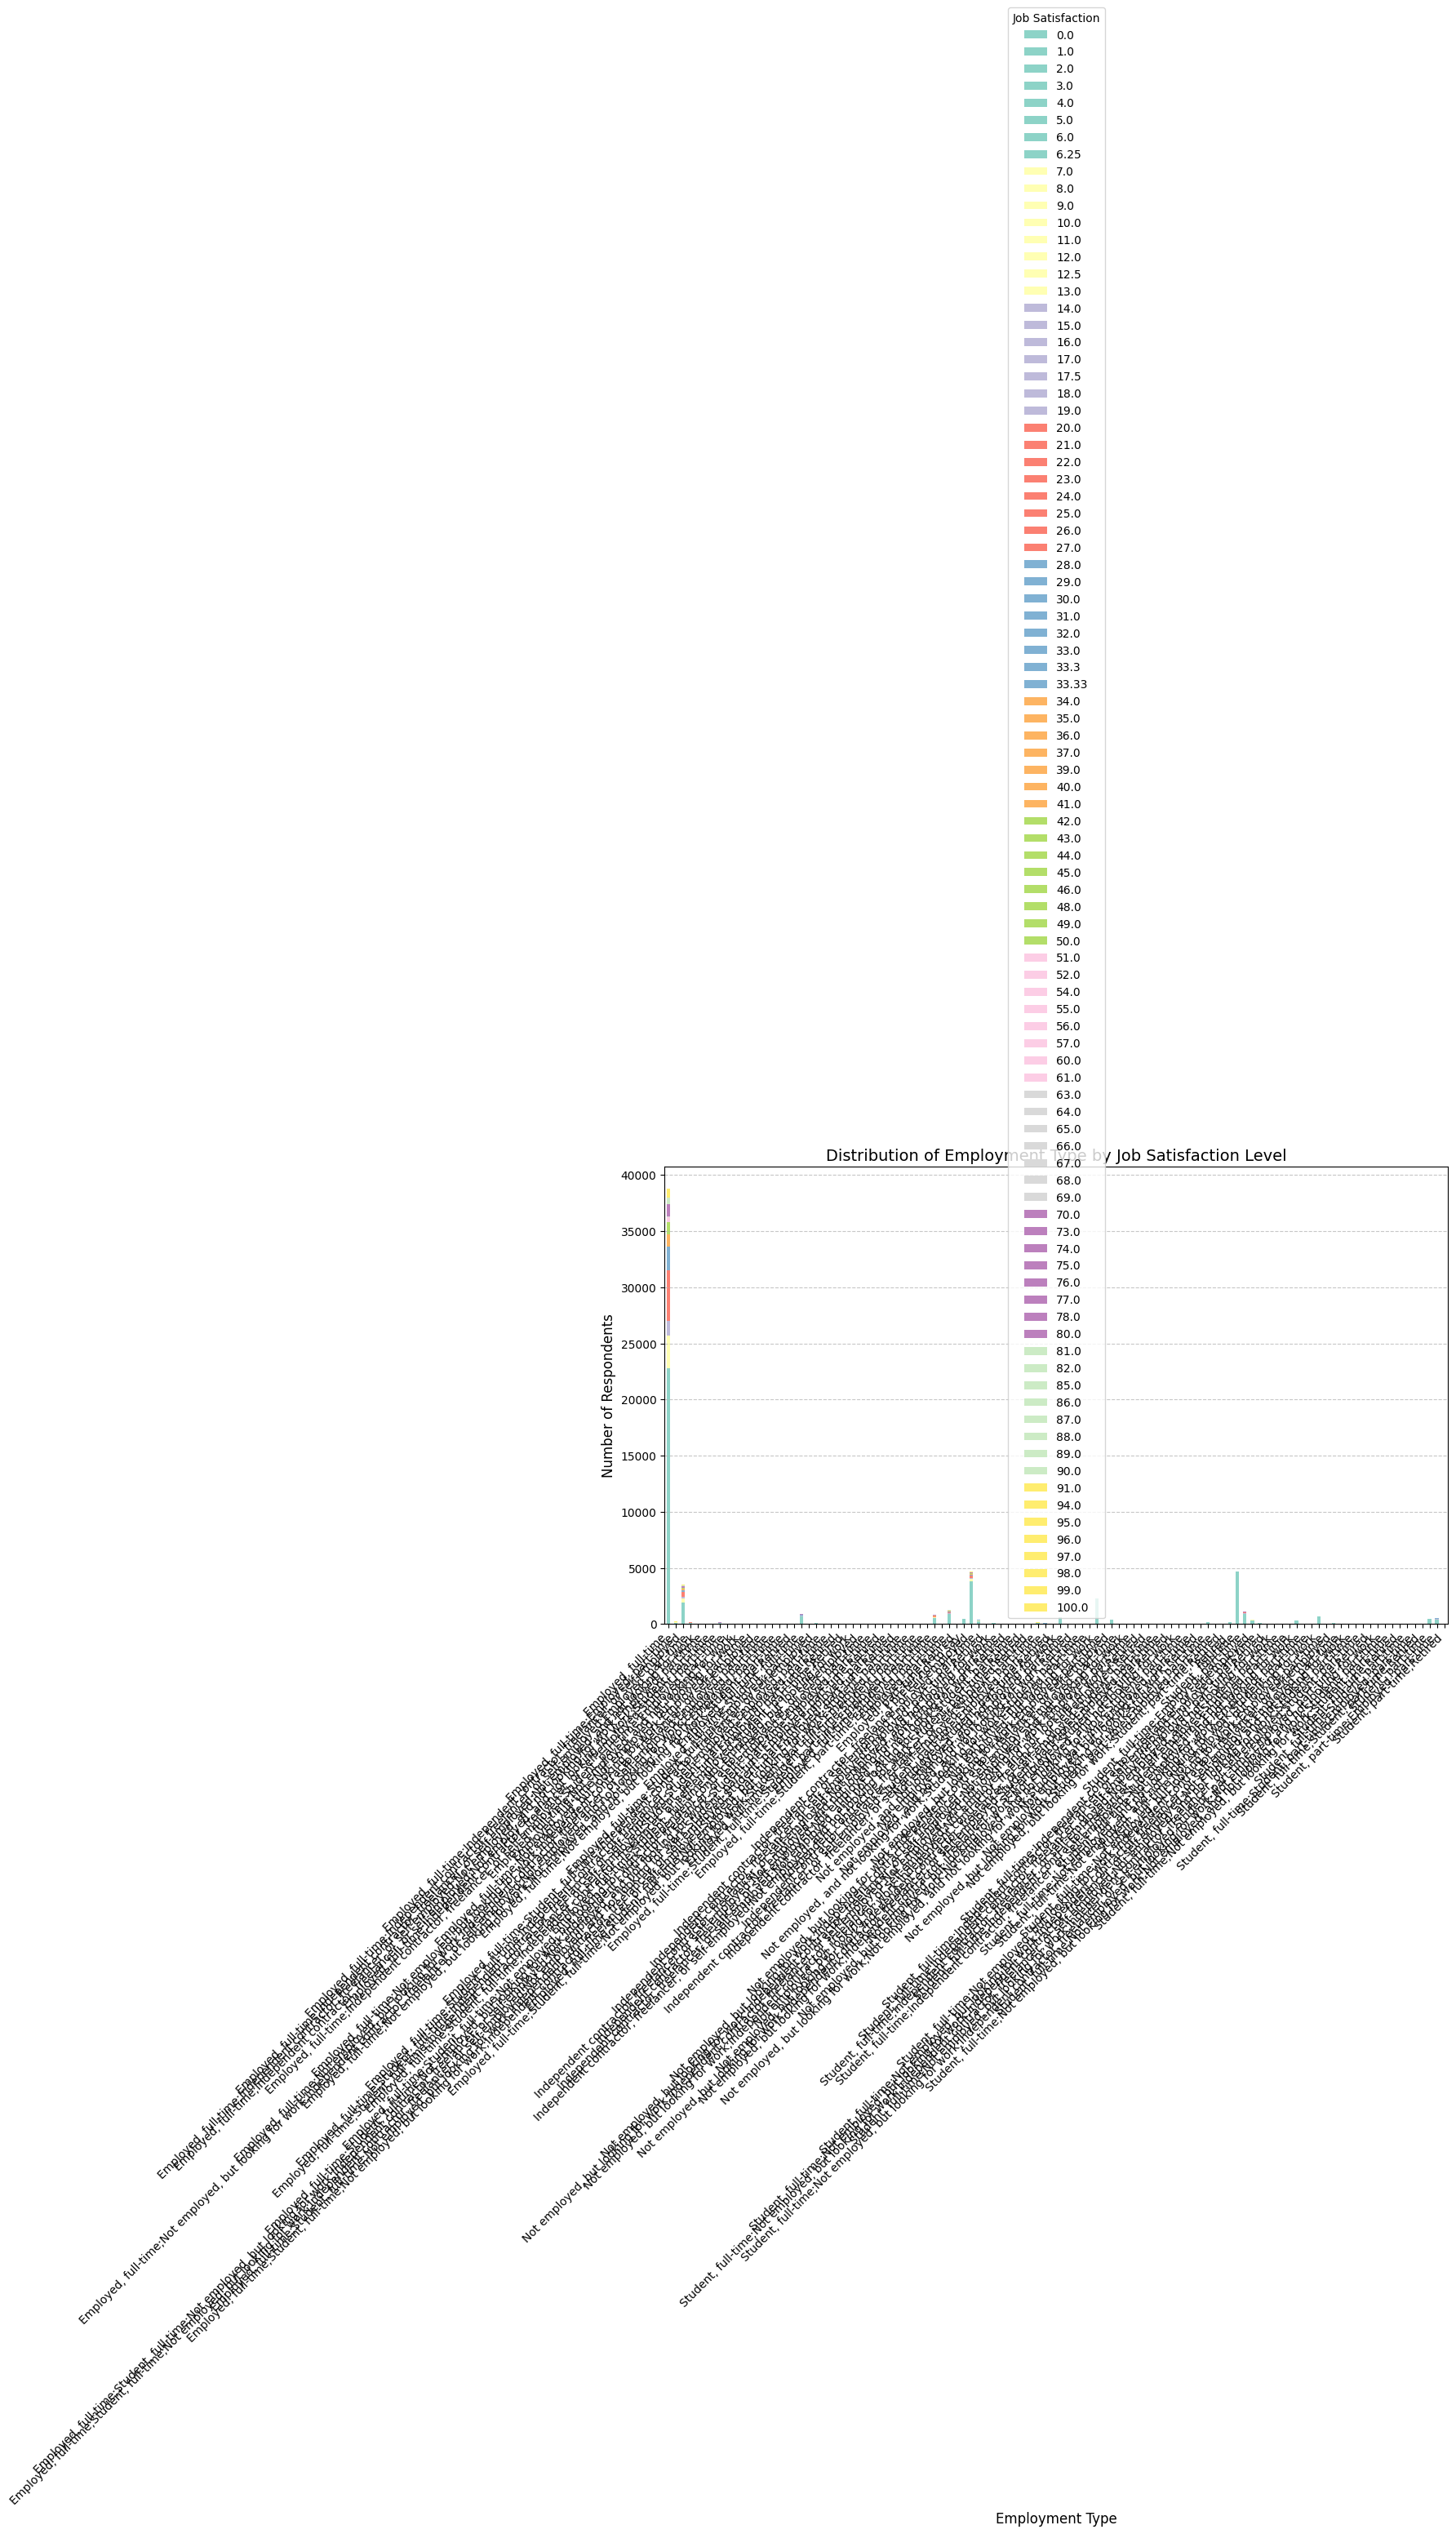

In [28]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Sample DataFrame structure for illustration (replace with actual data loading)

# Step 1: Clean and handle missing values
df_cleaned = df.dropna(subset=['Employment', 'JobSatPoints_6'])

# Fill missing job satisfaction points (optional step)
df_cleaned['JobSatPoints_6'] = df_cleaned['JobSatPoints_6'].fillna(0)

# Step 2: Group by Employment and JobSatPoints_6, and count occurrences
df_grouped = df_cleaned.groupby(['Employment', 'JobSatPoints_6']).size().unstack(fill_value=0)

# Debugging: Check the grouped data
print("\nGrouped Data by Employment and JobSatPoints_6:\n", df_grouped)

# Step 3: Plotting the stacked bar chart
plt.figure(figsize=(50, 40))

# Plot stacked bars for each employment type and job satisfaction level
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')

# Add labels and title with improved aesthetics
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.title('Distribution of Employment Type by Job Satisfaction Level', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add a grid for readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(title='Job Satisfaction', fontsize=10)

# Adjust layout for better spacing
plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9)

# Display the plot
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_84/2631605954.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)



Grouped Data by Age and LanguageAdmired:
              0                                                          \
           Ada Apex Assembly Bash/Shell (all shells)     C    C#   C++   
AgeNumeric                                                               
17          11    2      150                     527   462   367   588   
21          36   25      505                    2586  1977  1925  2311   
30          62   58      333                    4495  1486  3469  2100   
40          46   52      181                    3024   879  2700  1168   
50          34   47      109                    1392   504  1328   626   
60          15   22       87                     562   308   532   366   

                                  ...                                   \
           Clojure Cobol Crystal  ...  Rust   SQL Scala Solidity Swift   
AgeNumeric                        ...                                    
17              10     3       4  ...   435   440     6       10    

<Figure size 1200x800 with 0 Axes>

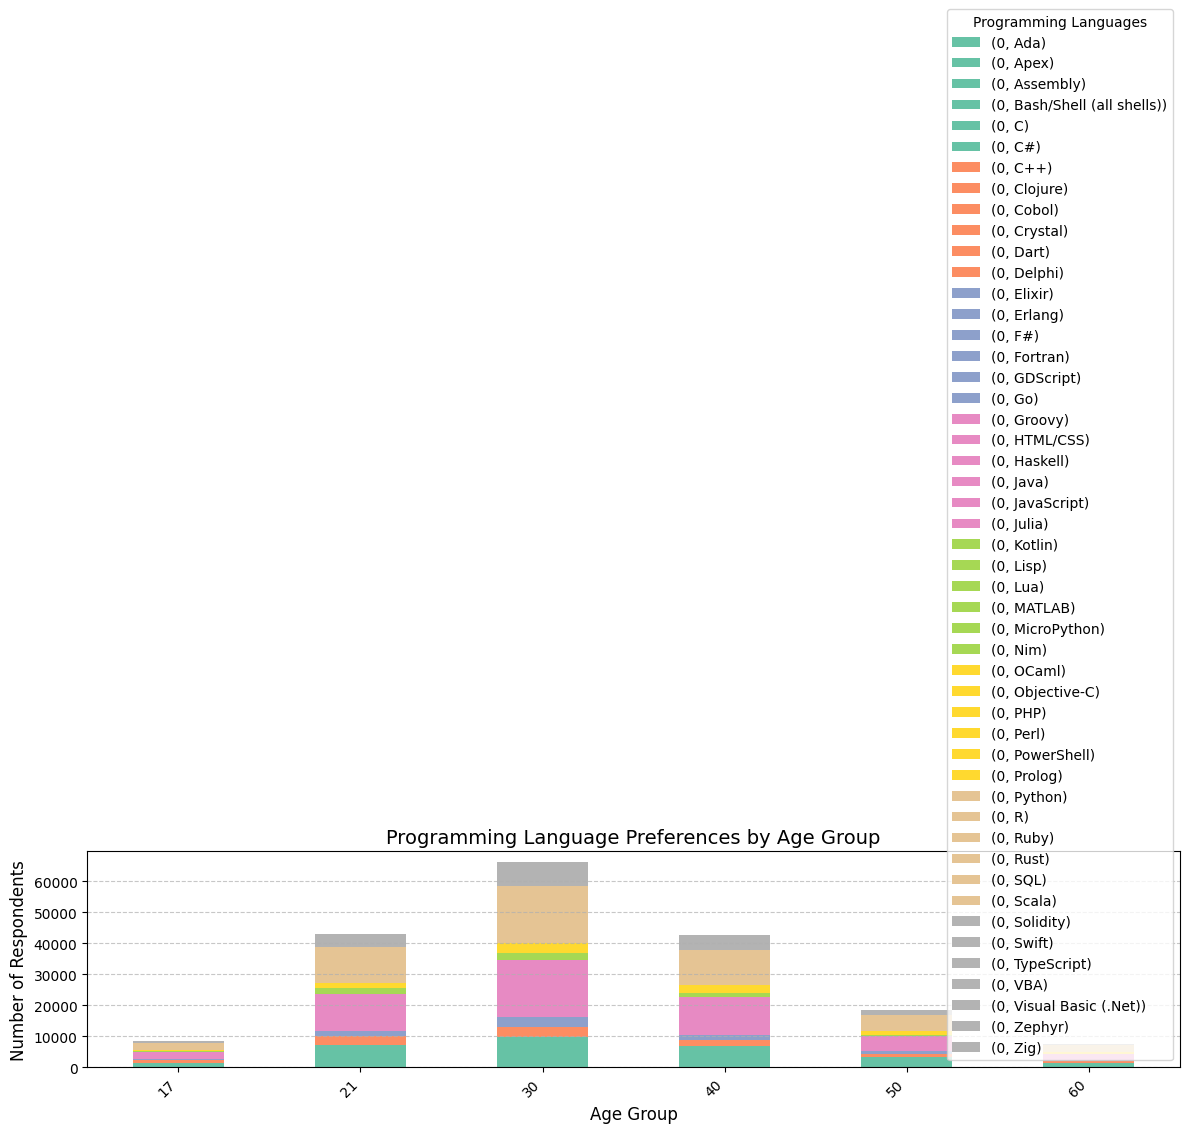

In [29]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Sample DataFrame structure for illustration (replace with actual data loading)

# Step 1: Handle missing values
df_cleaned = df.dropna(subset=['Age', 'LanguageAdmired'])

# Step 2: Map age into numeric values for plotting (if not done already)
age_mapping = {
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 30, 
    '35-44 years old': 40, 
    '45-54 years old': 50, 
    '55-64 years old': 60, 
    '65 years and older': 70
}
df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_mapping)

# Step 3: Create a new column to count programming language preferences
# Split the 'LanguageAdmired' column and count the occurrences of each language
language_pref = df_cleaned['LanguageAdmired'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Count the occurrences of each language within each age group
df_grouped = pd.DataFrame(language_pref.groupby([df_cleaned['AgeNumeric'], language_pref]).size()).unstack(fill_value=0)

# Debugging: Check the grouped data
print("\nGrouped Data by Age and LanguageAdmired:\n", df_grouped)

# Step 4: Plotting the stacked bar chart
plt.figure(figsize=(12, 8))

# Plot stacked bars for each age group and preferred programming language
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set2')

# Add labels and title with improved aesthetics
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.title('Programming Language Preferences by Age Group', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add a grid for readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend for the programming languages
plt.legend(title='Programming Languages', fontsize=10)

# Adjust layout for better spacing
plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9)

# Display the plot
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_84/1282798378.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 5000x4000 with 0 Axes>

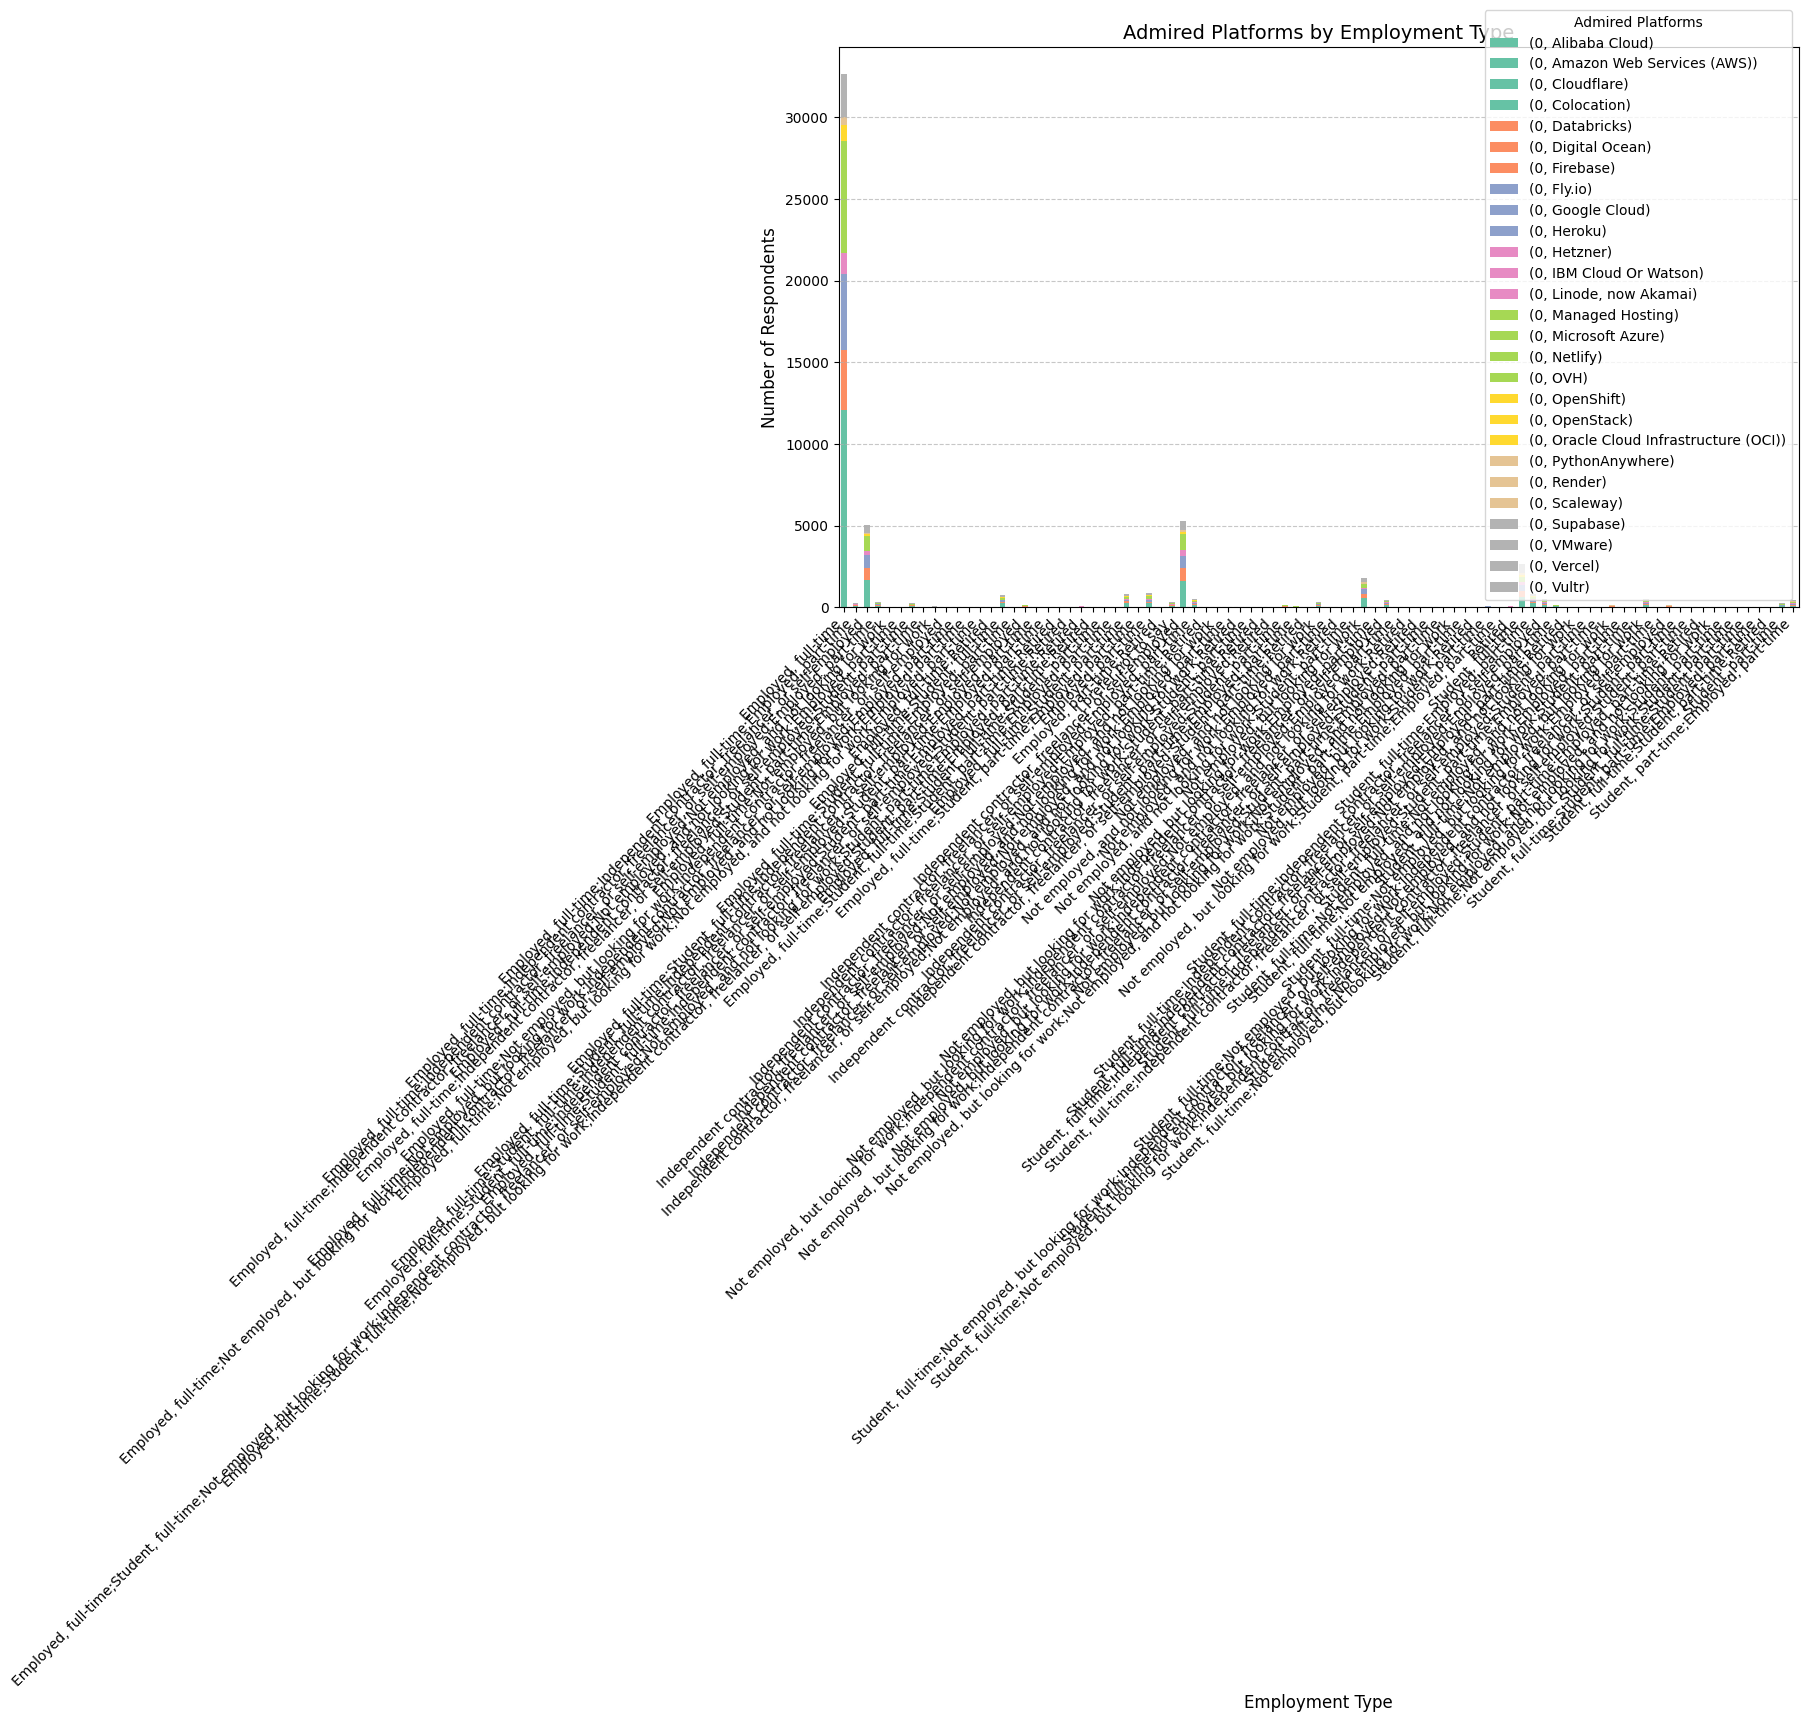

In [31]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame setup (replace with your actual data)
# Assuming df is already loaded

# Step 1: Clean the data (drop rows where PlatformAdmired is NA)
df_cleaned = df.dropna(subset=['PlatformAdmired'])

# Step 2: Split 'PlatformAdmired' by semicolon and count the occurrences of each platform
platform_pref = df_cleaned['PlatformAdmired'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Step 3: Create a DataFrame to count occurrences of each platform grouped by Employment
df_grouped = pd.DataFrame(platform_pref.groupby([df_cleaned['Employment'], platform_pref]).size()).unstack(fill_value=0)

# Step 4: Plotting the stacked bar chart
plt.figure(figsize=(50,40))

# Plot stacked bars for each employment type and admired platform
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set2')

# Add labels and title with improved aesthetics
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.title('Admired Platforms by Employment Type', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add a grid for readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend for the platforms
plt.legend(title='Admired Platforms', fontsize=10)

# Adjust layout for better spacing
plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9)

# Display the plot
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
